# Forest Fire Detection System - Main Workflow

This Jupyter Notebook serves as the main entry point for the Forest Fire Detection System. It orchestrates the entire workflow, from data preprocessing and dataset creation to model training, evaluation, and hyperparameter tuning. Each step can be run independently or sequentially.

https://firms.modaps.eosdis.nasa.gov/descriptions/FIRMS_VIIRS_Firehotspots.html

acquired time is UTC

## 1. Setup and Configuration

First, we'll import necessary modules and set up the configuration parameters, including data and output directories. We'll also ensure that the required directories exist.

In [1]:
import os
import logging
from config import Config

from reload_all import reload_all
import data_preprocessing
import data_groundtruth
import data_annotation
import data_sequences
import model_training
import model_utils
import model_autoencoder
import model_evaluator
import model_tuning

# Configure logging for better output in the notebook
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize configuration
# You can change these paths as needed
DATA_DIR = "data"
OUTPUT_DIR = "output"
MODEL_DIR = "models"

# Set environment variables for the Config class to pick up
os.environ['DATA_DIR'] = DATA_DIR
os.environ['OUTPUT_DIR'] = OUTPUT_DIR
os.environ['MODEL_DIR'] = MODEL_DIR

config = Config()

print(f"Using data directory: {config.DATA_DIR}")
print(f"Using output directory: {config.OUTPUT_DIR}")
print(f"Using model directory: {config.MODEL_DIR}")

# Ensure directories exist (Config() constructor already does this, but explicit is fine)
os.makedirs(config.DATA_DIR, exist_ok=True)
os.makedirs(config.OUTPUT_DIR, exist_ok=True)
os.makedirs(config.MODEL_DIR, exist_ok=True)

/home/rmukhia/data/ilab/forestfire/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using data directory: data
Using output directory: output
Using model directory: models


## 2. Data Preprocessing

This step processes the raw sensor data, resampling it and creates sliding windows. It fitlers out invalid windows.
This step adds `window_id`, `sample_index`.

2025-08-20 18:21:42,961 - INFO - --- Preprocessing raw sensor data ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [Preprocessing] Created temporary directory: /tmp/forestfire_preprocessing_mn_kweb6


2025-08-20 18:21:42,973 - INFO - [Preprocessing] Created temporary directory: /tmp/forestfire_preprocessing_mn_kweb6


INFO: [Preprocessing] Starting Streamlined Data Preprocessing Pipeline


2025-08-20 18:21:42,974 - INFO - [Preprocessing] Starting Streamlined Data Preprocessing Pipeline


INFO: [Preprocessing] Stage 1: Loading raw data and creating sensor partitions


2025-08-20 18:21:42,975 - INFO - [Preprocessing] Stage 1: Loading raw data and creating sensor partitions


INFO: [DataLoader] Loading raw sensor data from data/sensor_data.csv


2025-08-20 18:21:42,976 - INFO - [DataLoader] Loading raw sensor data from data/sensor_data.csv


INFO: [DataLoader] Raw sensor data: 40000 rows, 14 columns


2025-08-20 18:21:43,261 - INFO - [DataLoader] Raw sensor data: 40000 rows, 14 columns


INFO: [DataLoader] Memory usage: 8.05 MB


2025-08-20 18:21:43,269 - INFO - [DataLoader] Memory usage: 8.05 MB


INFO: [Preprocessing] Creating sensor-specific temporary partitions


2025-08-20 18:21:43,270 - INFO - [Preprocessing] Creating sensor-specific temporary partitions
Creating partitions: 100%|██████████| 8/8 [00:00<00:00, 91.21it/s]

INFO: [Preprocessing] Created 8 sensor partitions in /tmp/forestfire_preprocessing_mn_kweb6



2025-08-20 18:21:43,362 - INFO - [Preprocessing] Created 8 sensor partitions in /tmp/forestfire_preprocessing_mn_kweb6


INFO: [Preprocessing] Stage 2: Distributed processing per sensor


2025-08-20 18:21:43,477 - INFO - [Preprocessing] Stage 2: Distributed processing per sensor


INFO: [Preprocessing] Starting coordinated distributed processing


2025-08-20 18:21:43,478 - INFO - [Preprocessing] Starting coordinated distributed processing


INFO: [Preprocessing] Prepared 8 sensors for processing, expecting ~39528 total windows


2025-08-20 18:21:43,504 - INFO - [Preprocessing] Prepared 8 sensors for processing, expecting ~39528 total windows


INFO: [Preprocessing] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status


2025-08-20 18:21:44,152 - INFO - [Preprocessing] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status


INFO: [Preprocessing] Aggregated metrics from 8 partitions.


2025-08-20 18:21:48,649 - INFO - [Preprocessing] Aggregated metrics from 8 partitions.


INFO: [Preprocessing] Processing metrics saved to output/stats/csv/processing_metrics.csv and summary to output/stats/csv/processing_summary.json


2025-08-20 18:21:48,680 - INFO - [Preprocessing] Processing metrics saved to output/stats/csv/processing_metrics.csv and summary to output/stats/csv/processing_summary.json


INFO: [Preprocessing] Stage 3: Creating comprehensive visualization dashboard


2025-08-20 18:21:48,681 - INFO - [Preprocessing] Stage 3: Creating comprehensive visualization dashboard


INFO: [Preprocessing] Generating preprocessing statistics from metrics


2025-08-20 18:21:48,681 - INFO - [Preprocessing] Generating preprocessing statistics from metrics


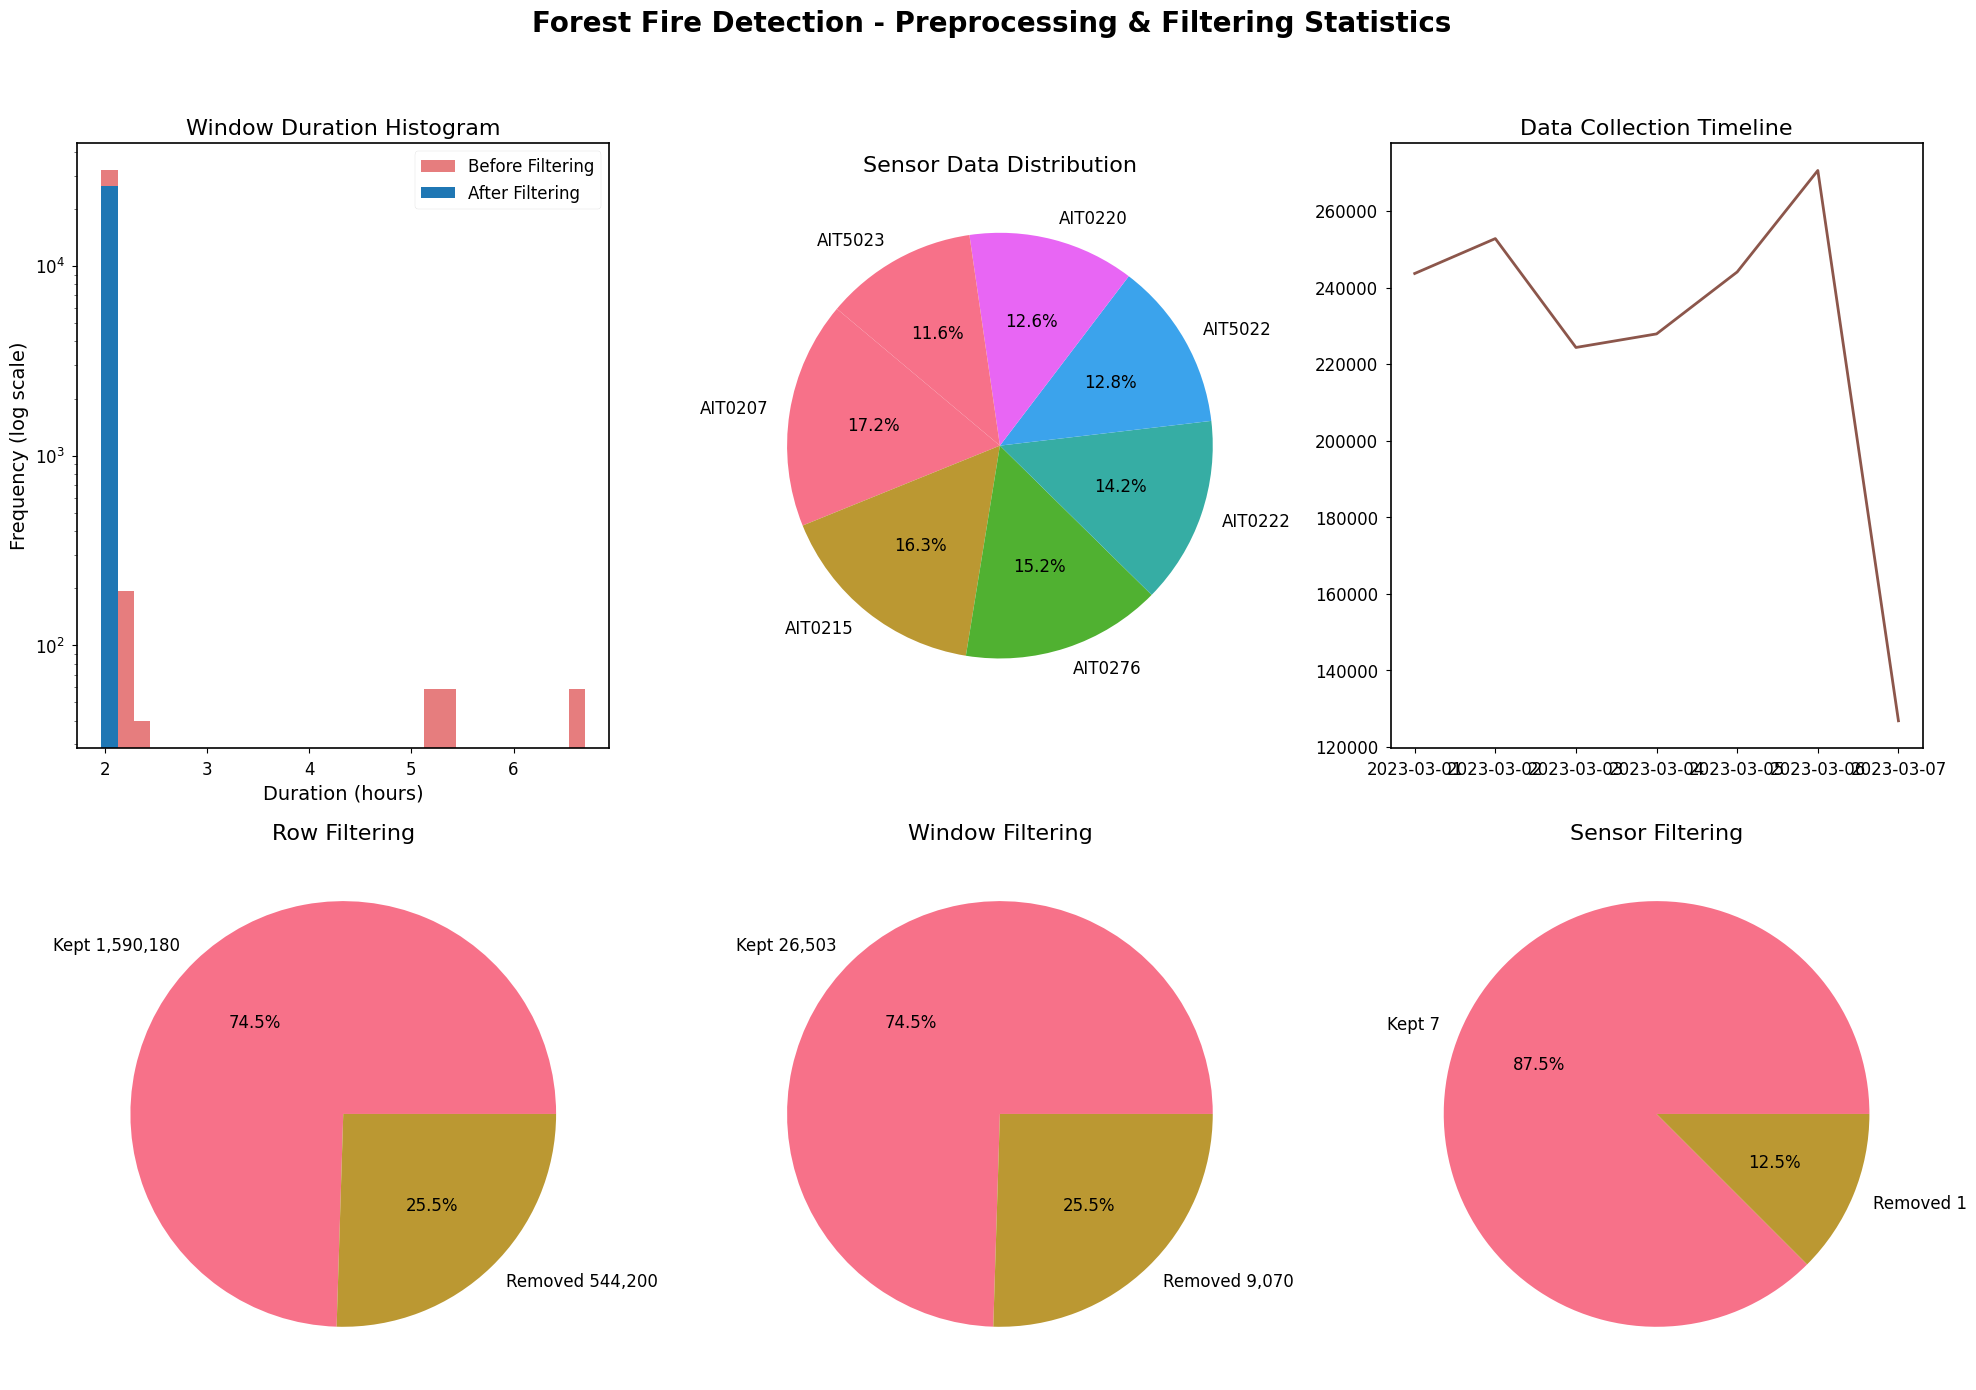

INFO: [Preprocessing] Statistics plot saved to: output/stats/images/preprocessing_statistics.png


2025-08-20 18:21:50,441 - INFO - [Preprocessing] Statistics plot saved to: output/stats/images/preprocessing_statistics.png


INFO: [Preprocessing] Stage 4: Saving final metadata


2025-08-20 18:21:50,443 - INFO - [Preprocessing] Stage 4: Saving final metadata


INFO: [Preprocessing] Comprehensive metadata saved to output/stats/csv/processing_metadata.json


2025-08-20 18:21:50,444 - INFO - [Preprocessing] Comprehensive metadata saved to output/stats/csv/processing_metadata.json


INFO: [Preprocessing] Cleaned up temporary directory: /tmp/forestfire_preprocessing_mn_kweb6


2025-08-20 18:21:50,445 - INFO - [Preprocessing] Cleaned up temporary directory: /tmp/forestfire_preprocessing_mn_kweb6


INFO: Process timeline saved to output/stats/html/preprocessing_timeline.html


2025-08-20 18:21:50,547 - INFO - Process timeline saved to output/stats/html/preprocessing_timeline.html


INFO: [Preprocessing] Advanced preprocessing pipeline completed


2025-08-20 18:21:50,548 - INFO - [Preprocessing] Advanced preprocessing pipeline completed


In [2]:
# Set to True to skip this step
SKIP_PREPROCESS = False

if not SKIP_PREPROCESS:
    logging.info("--- Preprocessing raw sensor data ---")
    reload_all()
    data_preprocessing.preprocess_data(config)
else:
    logging.info("Skipping Preprocessing raw sensor data")

## 3. Annotate with the closest fire encountered and the distance

This step attotates the window data with `fire_id`, `distance_to_fire_m`.

2025-08-20 18:21:50,555 - INFO - --- Creating annotate for autoencoder training ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [Annotation] Starting high-accuracy annotation workflow


2025-08-20 18:21:50,947 - INFO - [Annotation] Starting high-accuracy annotation workflow


INFO: [DataLoader] Loading raw sensor data from data/sensor_data.csv


2025-08-20 18:21:50,948 - INFO - [DataLoader] Loading raw sensor data from data/sensor_data.csv


INFO: [DataLoader] Raw sensor data: 40000 rows, 14 columns


2025-08-20 18:21:51,242 - INFO - [DataLoader] Raw sensor data: 40000 rows, 14 columns


INFO: [DataLoader] Memory usage: 8.05 MB


2025-08-20 18:21:51,250 - INFO - [DataLoader] Memory usage: 8.05 MB


INFO: [DataLoader] Loading label data from output/processed_data/label.csv


2025-08-20 18:21:51,250 - INFO - [DataLoader] Loading label data from output/processed_data/label.csv


INFO: [DataLoader] Fire labels: 43355 rows, 6 columns


2025-08-20 18:21:51,431 - INFO - [DataLoader] Fire labels: 43355 rows, 6 columns


INFO: [DataLoader] Memory usage: 6.37 MB


2025-08-20 18:21:51,440 - INFO - [DataLoader] Memory usage: 6.37 MB


INFO: [DataLoader] Loading location data from data/dim_location.csv


2025-08-20 18:21:51,440 - INFO - [DataLoader] Loading location data from data/dim_location.csv


INFO: [DataLoader] Sensor locations: 10 rows, 7 columns


2025-08-20 18:21:51,443 - INFO - [DataLoader] Sensor locations: 10 rows, 7 columns


INFO: [DataLoader] Memory usage: 0.00 MB


2025-08-20 18:21:51,443 - INFO - [DataLoader] Memory usage: 0.00 MB


INFO: [Annotation] Starting coordinated distributed annotation


2025-08-20 18:21:51,444 - INFO - [Annotation] Starting coordinated distributed annotation


INFO: [Annotation] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status


2025-08-20 18:21:51,987 - INFO - [Annotation] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status
Annotating Sensor AIT0276: 100%|██████████| 4025/4025 [00:02<00:00, 1498.22it/s]


INFO: [Annotation] Processed 7 sensor files


2025-08-20 18:22:02,068 - INFO - [Annotation] Processed 7 sensor files


INFO: [Annotation] Generating annotation statistics from collected metrics


2025-08-20 18:22:02,073 - INFO - [Annotation] Generating annotation statistics from collected metrics


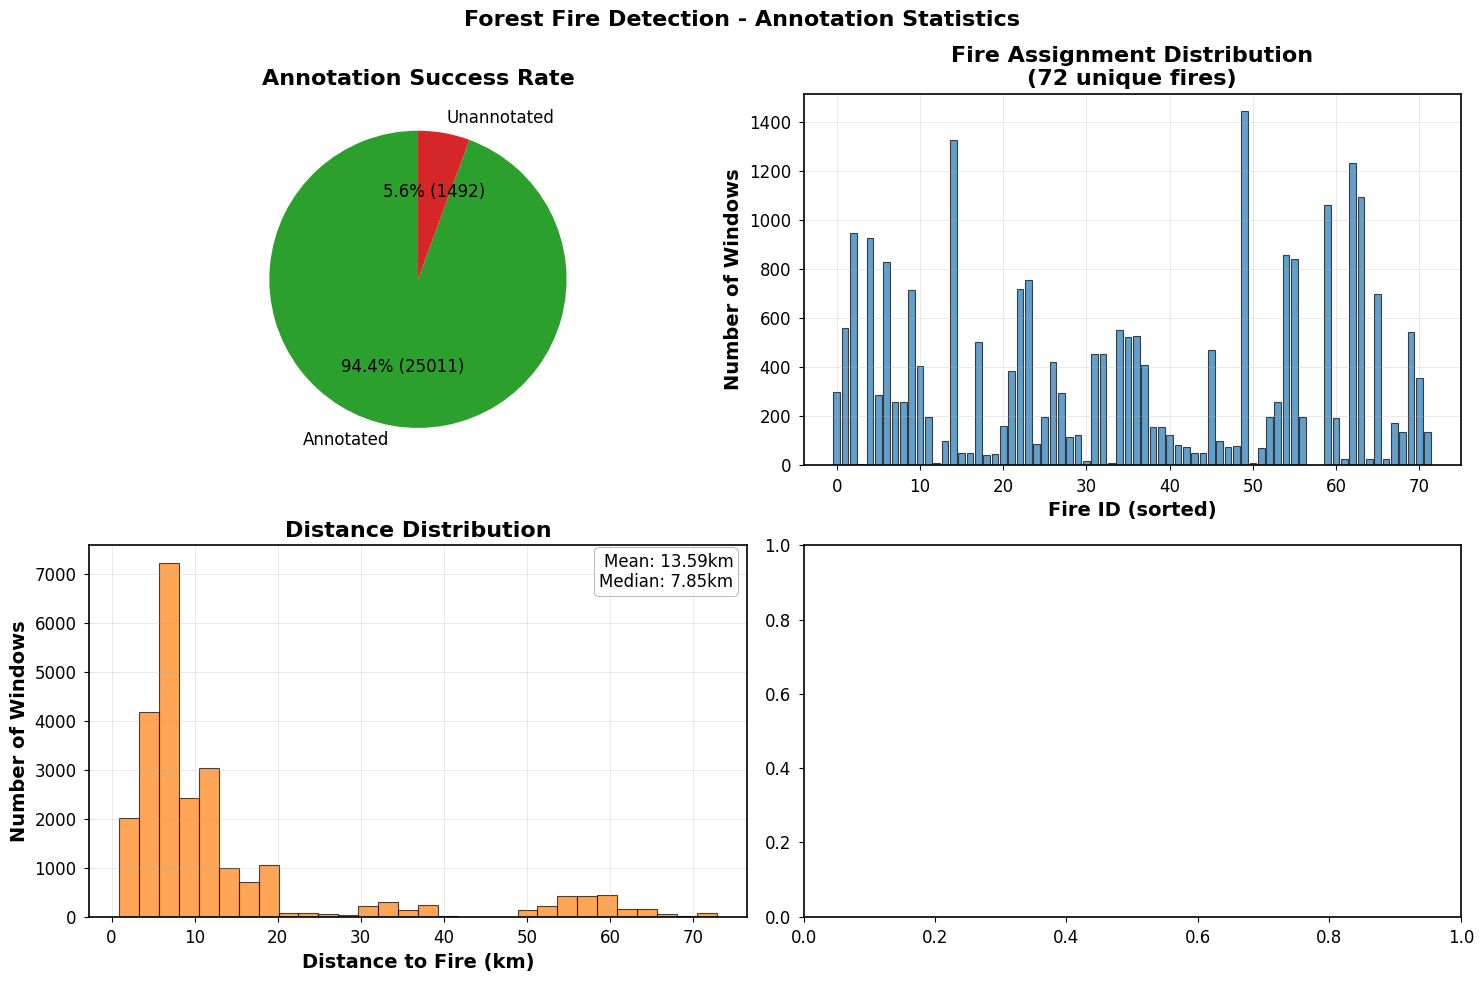

INFO: [Annotation] Statistics saved to: output/stats/images/sensor_data_window_fire_distance_statistics.png


2025-08-20 18:22:03,172 - INFO - [Annotation] Statistics saved to: output/stats/images/sensor_data_window_fire_distance_statistics.png


INFO: [Annotation] Annotation completed


2025-08-20 18:22:03,173 - INFO - [Annotation] Annotation completed


INFO: Process timeline saved to output/stats/html/annotation_timeline.html


2025-08-20 18:22:03,204 - INFO - Process timeline saved to output/stats/html/annotation_timeline.html


In [3]:
# Set to True to skip this step
SKIP_MAKE_ANNOTATE = False

if not SKIP_MAKE_ANNOTATE:
    logging.info("--- Creating annotate for autoencoder training ---")
    reload_all()
    data_groundtruth.collect_groundtruth(config, 200)
    data_annotation.annotate_data(config)
else:
    logging.info("Skipping Creating annotate for autoencoder training")

## 4. Create Dataset for Autoencoder Training

After preprocessing, this step creates the time-series sliding windows from the processed sensor data, normalizes them, and prepares the dataset for autoencoder training. It also generates the necessary PyTorch tensors and saves them.

`TensorDataset(sequences, fire_ids, distances, window_ids)`

2025-08-20 18:22:03,411 - INFO - --- Creating dataset for autoencoder training ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [Sequence_Creation] DataSequencer initialized


2025-08-20 18:22:03,427 - INFO - [Sequence_Creation] DataSequencer initialized


INFO: [Sequence_Creation] Starting comprehensive dataset creation workflow


2025-08-20 18:22:03,428 - INFO - [Sequence_Creation] Starting comprehensive dataset creation workflow


INFO: [Sequence_Creation] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status


2025-08-20 18:22:03,891 - INFO - [Sequence_Creation] Started Dask cluster with 6 workers: http://127.0.0.1:8787/status


INFO: [Sequence_Creation] Loaded processed data from output/annotated_data as Dask DataFrame


2025-08-20 18:22:03,915 - INFO - [Sequence_Creation] Loaded processed data from output/annotated_data as Dask DataFrame


INFO: [Sequence_Creation] Starting sequence creation and feature scaling


2025-08-20 18:22:03,917 - INFO - [Sequence_Creation] Starting sequence creation and feature scaling


INFO: [Sequence_Creation] Fitting new scaler on data


2025-08-20 18:22:03,918 - INFO - [Sequence_Creation] Fitting new scaler on data


INFO: [Sequence_Creation] Scaler fitted and saved to models/scaler.joblib


2025-08-20 18:22:04,865 - INFO - [Sequence_Creation] Scaler fitted and saved to models/scaler.joblib


INFO: [Sequence_Creation] Scaling input features using fitted scaler


2025-08-20 18:22:04,866 - INFO - [Sequence_Creation] Scaling input features using fitted scaler


INFO: [Sequence_Creation] Grouping data by window_id to create sequences using Dask


2025-08-20 18:22:04,870 - INFO - [Sequence_Creation] Grouping data by window_id to create sequences using Dask
2025-08-20 18:22:05,047 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle d036a42557812cbc39be23c07a729347 initialized by task ('shuffle-transfer-d036a42557812cbc39be23c07a729347', 3) executed on worker tcp://127.0.0.1:41229
2025-08-20 18:22:09,172 - distributed.shuffle._scheduler_plugin - WARNING - Shuffle d036a42557812cbc39be23c07a729347 deactivated due to stimulus 'task-finished-1755688929.1682866'
/home/rmukhia/data/ilab/forestfire/.venv/lib/python3.12/site-packages/dask/dataframe/groupby.py:116: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return g.apply(func, *args, **kwargs)

INFO: [Sequence_Creation] Created 26503 sequences, each with shape torch.Size([60, 1])


2025-08-20 18:22:13,250 - INFO - [Sequence_Creation] Created 26503 sequences, each with shape torch.Size([60, 1])


INFO: [Sequence_Creation] Extracting unscaled metadata (fire_id, distance_to_fire_m, window_id) using Dask


2025-08-20 18:22:13,253 - INFO - [Sequence_Creation] Extracting unscaled metadata (fire_id, distance_to_fire_m, window_id) using Dask


INFO: [Sequence_Creation] Full TensorDataset saved to output/processed_data/dataset.pt


2025-08-20 18:22:13,380 - INFO - [Sequence_Creation] Full TensorDataset saved to output/processed_data/dataset.pt


INFO: [Sequence_Creation] Generating sequence creation statistics


2025-08-20 18:22:13,386 - INFO - [Sequence_Creation] Generating sequence creation statistics


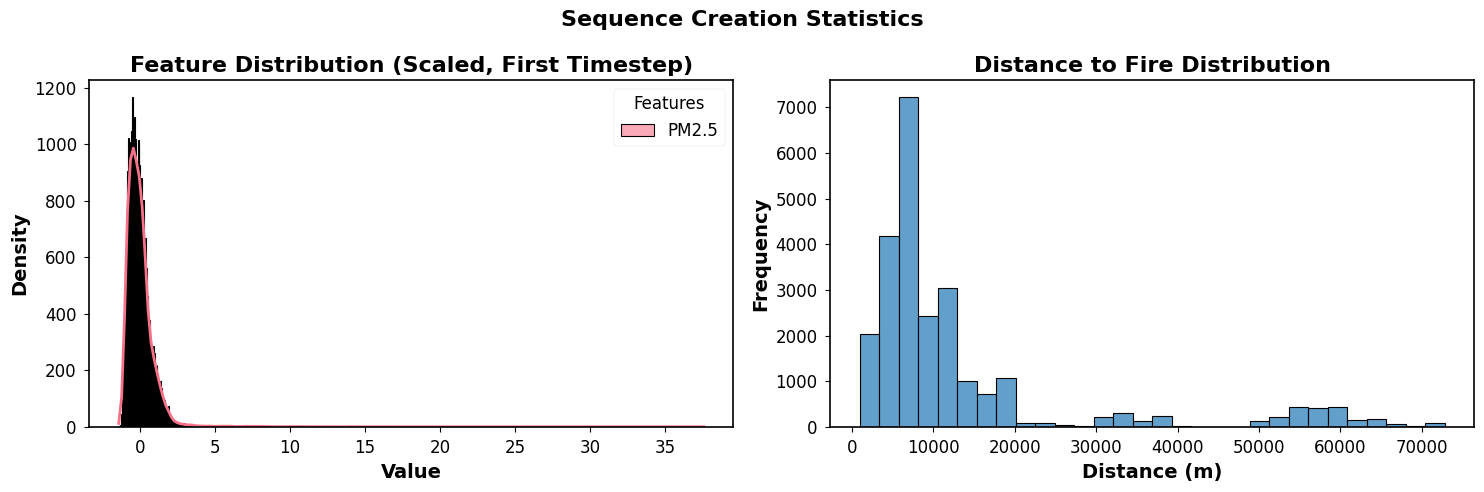

INFO: [Sequence_Creation] Statistics plot saved to: output/stats/images/sequence_creation_statistics.png


2025-08-20 18:22:14,537 - INFO - [Sequence_Creation] Statistics plot saved to: output/stats/images/sequence_creation_statistics.png


INFO: [Sequence_Creation] Dataset creation completed successfully


2025-08-20 18:22:15,420 - INFO - [Sequence_Creation] Dataset creation completed successfully


INFO: Process timeline saved to output/stats/html/sequence_creation_timeline.html


2025-08-20 18:22:15,449 - INFO - Process timeline saved to output/stats/html/sequence_creation_timeline.html


In [4]:
# Set to True to skip this step
SKIP_MAKE_DATASET = False

if not SKIP_MAKE_DATASET:
    logging.info("--- Creating dataset for autoencoder training ---")
    reload_all()
    data_groundtruth
    data_sequences.create_dataset(config, fit_scaler=True)
else:
    logging.info("Skipping Creating dataset for autoencoder training")

## 4. Train the Autoencoder Model

This section trains the autoencoder neural network using the prepared dataset. The model learns to reconstruct normal environmental patterns, which is crucial for anomaly detection.

2025-08-20 18:22:15,456 - INFO - --- Training the autoencoder model ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [Training] Starting model training


2025-08-20 18:22:15,468 - INFO - [Training] Starting model training


INFO: [Training] Random seed set


2025-08-20 18:22:15,470 - INFO - [Training] Random seed set


INFO: [DataLoader_Creation] Starting dataloader creation process


2025-08-20 18:22:15,471 - INFO - [DataLoader_Creation] Starting dataloader creation process


INFO: [DataLoader_Creation] Dataset loaded successfully


2025-08-20 18:22:15,474 - INFO - [DataLoader_Creation] Dataset loaded successfully


INFO: [DataLoader_Creation] Dataset statistics


2025-08-20 18:22:15,475 - INFO - [DataLoader_Creation] Dataset statistics


INFO: [DataLoader_Creation] Removing fire-labeled data from train and validation sets


2025-08-20 18:22:15,475 - INFO - [DataLoader_Creation] Removing fire-labeled data from train and validation sets


INFO: [DataLoader_Creation] Dataset sizes after removing fire labels


2025-08-20 18:22:15,479 - INFO - [DataLoader_Creation] Dataset sizes after removing fire labels


INFO: [DataLoader_Creation] Dataloaders created successfully


2025-08-20 18:22:15,480 - INFO - [DataLoader_Creation] Dataloaders created successfully


INFO: [Training] Data loaders created


2025-08-20 18:22:15,480 - INFO - [Training] Data loaders created


INFO: [Training] Model Architecture:


2025-08-20 18:22:15,482 - INFO - [Training] Model Architecture:


INFO: [Training] Model type: VariationalAutoencoder


2025-08-20 18:22:15,483 - INFO - [Training] Model type: VariationalAutoencoder


INFO: [Training] Total parameters: 82,932


2025-08-20 18:22:15,483 - INFO - [Training] Total parameters: 82,932


INFO: [Training] Trainable parameters: 82,932


2025-08-20 18:22:15,484 - INFO - [Training] Trainable parameters: 82,932


INFO: [Training] Layer encoder_fc.0: Linear(in_features=60, out_features=360, bias=True), Parameters: 21,600


2025-08-20 18:22:15,484 - INFO - [Training] Layer encoder_fc.0: Linear(in_features=60, out_features=360, bias=True), Parameters: 21,600


INFO: [Training] Layer encoder_fc.1: ReLU()


2025-08-20 18:22:15,485 - INFO - [Training] Layer encoder_fc.1: ReLU()


INFO: [Training] Layer fc_mean: Linear(in_features=360, out_features=36, bias=True), Parameters: 12,960


2025-08-20 18:22:15,486 - INFO - [Training] Layer fc_mean: Linear(in_features=360, out_features=36, bias=True), Parameters: 12,960


INFO: [Training] Layer fc_logvar: Linear(in_features=360, out_features=36, bias=True), Parameters: 12,960


2025-08-20 18:22:15,487 - INFO - [Training] Layer fc_logvar: Linear(in_features=360, out_features=36, bias=True), Parameters: 12,960


INFO: [Training] Layer decoder.0: Linear(in_features=36, out_features=360, bias=True), Parameters: 12,960


2025-08-20 18:22:15,487 - INFO - [Training] Layer decoder.0: Linear(in_features=36, out_features=360, bias=True), Parameters: 12,960


INFO: [Training] Layer decoder.1: ReLU()


2025-08-20 18:22:15,488 - INFO - [Training] Layer decoder.1: ReLU()


INFO: [Training] Layer decoder.2: Linear(in_features=360, out_features=60, bias=True), Parameters: 21,600


2025-08-20 18:22:15,488 - INFO - [Training] Layer decoder.2: Linear(in_features=360, out_features=60, bias=True), Parameters: 21,600


INFO: [Training] Model initialized


2025-08-20 18:22:15,488 - INFO - [Training] Model initialized


INFO: [Training] Training on: cpu


2025-08-20 18:22:15,489 - INFO - [Training] Training on: cpu


INFO: [Training] Optimizer configured


2025-08-20 18:22:16,011 - INFO - [Training] Optimizer configured


INFO: [Training] Training started


2025-08-20 18:22:16,012 - INFO - [Training] Training started


Training Epochs:  22%|██▏       | 44/200 [00:04<00:17,  8.83it/s, Train Loss=0.227946, Val Loss=0.313819, Best Loss=0.299623, No Improve=10, Status=Early Stop]
INFO: [Training] Training completed


2025-08-20 18:22:20,998 - INFO - [Training] Training completed


INFO: [Training] Generating training statistics


2025-08-20 18:22:21,000 - INFO - [Training] Generating training statistics


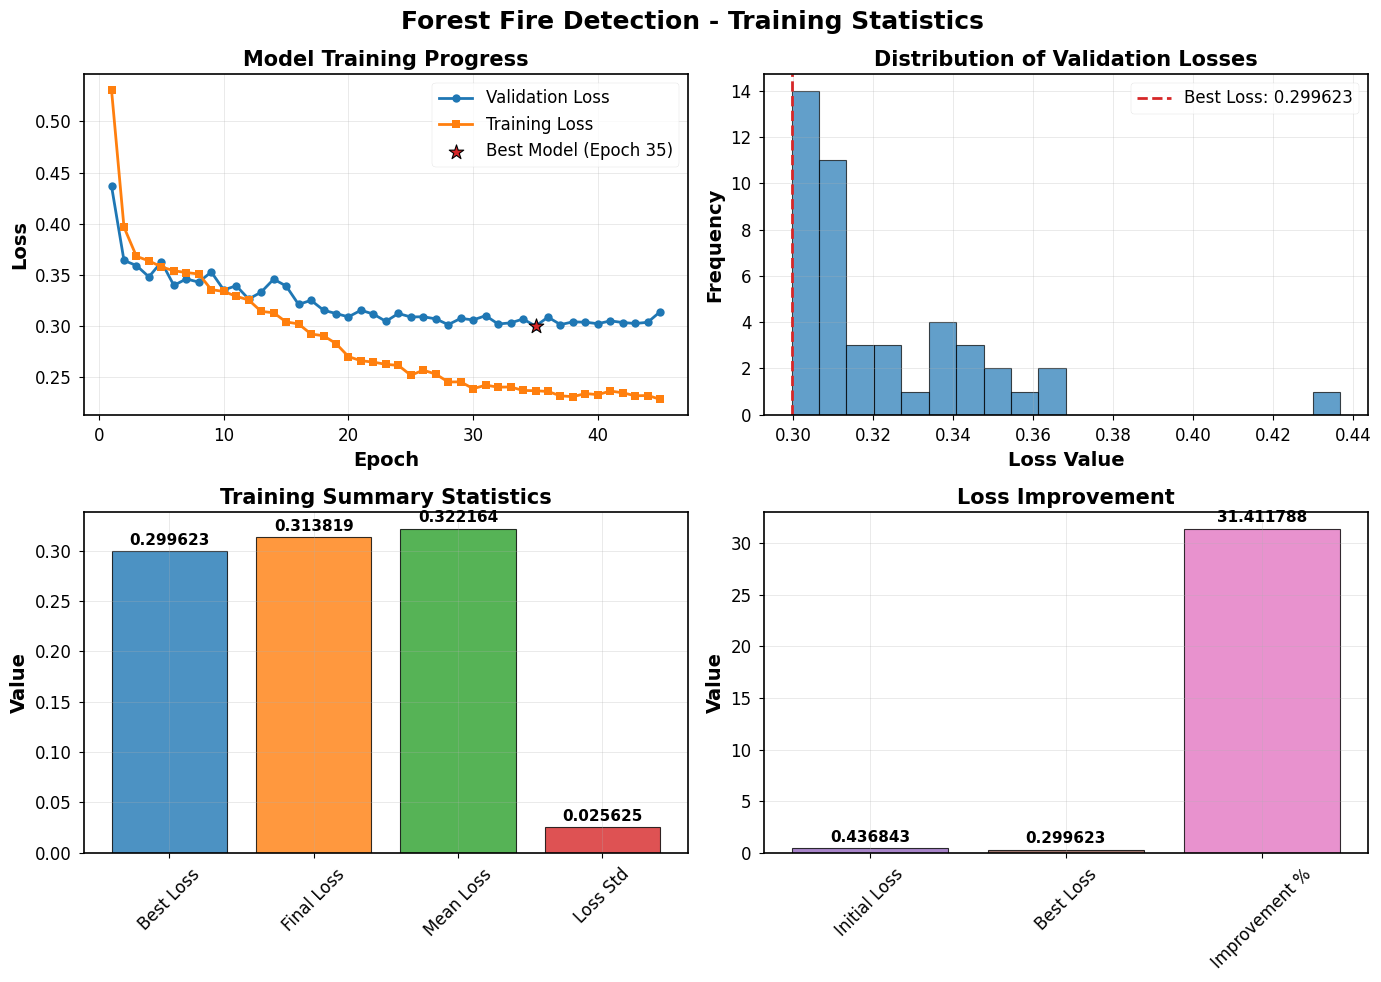

INFO: [Training] Training statistics saved to: output/stats/images/training_statistics.png


2025-08-20 18:22:22,151 - INFO - [Training] Training statistics saved to: output/stats/images/training_statistics.png


INFO: Process timeline saved to output/stats/html/training_timeline.html


2025-08-20 18:22:22,196 - INFO - Process timeline saved to output/stats/html/training_timeline.html


INFO: Metrics plot saved to output/stats/html/training_metrics.html


2025-08-20 18:22:22,230 - INFO - Metrics plot saved to output/stats/html/training_metrics.html


INFO: [Training] Training completed! Check the output directory for detailed logs and visualizations.


2025-08-20 18:22:22,230 - INFO - [Training] Training completed! Check the output directory for detailed logs and visualizations.


In [5]:
# Set to True to skip this step
SKIP_TRAIN = False

if not SKIP_TRAIN:
    logging.info("--- Training the autoencoder model ---")
    reload_all()
    config.EPOCHS = 200
    config.BATCH_SIZE = 32
    config.AUTOENCODER_CLASS =   "VariationalAutoencoder" # "DenseAutoencoder"  # Default autoencoder class
    #config.AUTOENCODER_CLASS = "DenseAutoencoder"  # Default autoencoder class
    config.LATENT_DIM = 36
    config.HIDDEN_DIM = 360
    config.LEARNING_RATE = 5e-4
    config.SPLIT_DISTANCE_THRESHOLD = 5000  # 20 km
    model_training.train_autoencoder(config)
else:
    logging.info("Skipping Training the autoencoder model")

## 5. Evaluate the Model

After training, the model is evaluated to assess its performance in detecting anomalies. This step calculates reconstruction errors, applies anomaly thresholds, and compares predictions against ground truth fire events to compute metrics like precision, recall, and F1-score.

2025-08-20 18:22:22,236 - INFO - --- Evaluating the model ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [DataLoader_Creation] Starting dataloader creation process


2025-08-20 18:22:22,250 - INFO - [DataLoader_Creation] Starting dataloader creation process


INFO: [DataLoader_Creation] Dataset loaded successfully


2025-08-20 18:22:22,252 - INFO - [DataLoader_Creation] Dataset loaded successfully


INFO: [DataLoader_Creation] Dataset statistics


2025-08-20 18:22:22,254 - INFO - [DataLoader_Creation] Dataset statistics


INFO: [DataLoader_Creation] Dataloaders created successfully


2025-08-20 18:22:22,255 - INFO - [DataLoader_Creation] Dataloaders created successfully


INFO: [Evaluation] Test data loaded


2025-08-20 18:22:22,256 - INFO - [Evaluation] Test data loaded


INFO: [Evaluation] Model loaded successfully


2025-08-20 18:22:22,258 - INFO - [Evaluation] Model loaded successfully


INFO: [Evaluation] Starting model evaluation


2025-08-20 18:22:22,258 - INFO - [Evaluation] Starting model evaluation


INFO: [Evaluation] Computing reconstruction errors


2025-08-20 18:22:22,259 - INFO - [Evaluation] Computing reconstruction errors
Computing reconstruction errors: 100%|██████████| 125/125 [00:00<00:00, 958.66it/s]

INFO: [Evaluation] Reconstruction errors computed



2025-08-20 18:22:22,393 - INFO - [Evaluation] Reconstruction errors computed


INFO: [Evaluation] Anomaly threshold computed


2025-08-20 18:22:22,394 - INFO - [Evaluation] Anomaly threshold computed


INFO: [Evaluation] Creating true labels with fire IDs and distance filtering


2025-08-20 18:22:22,395 - INFO - [Evaluation] Creating true labels with fire IDs and distance filtering


INFO: [Evaluation] True labels created with distance filtering


2025-08-20 18:22:22,396 - INFO - [Evaluation] True labels created with distance filtering


INFO: [Evaluation] Evaluation metrics calculated


2025-08-20 18:22:22,397 - INFO - [Evaluation] Evaluation metrics calculated


INFO: [Evaluation] TP: 142, FP: 653, FN: 507, TN: 2674


2025-08-20 18:22:22,398 - INFO - [Evaluation] TP: 142, FP: 653, FN: 507, TN: 2674


INFO: [Evaluation] Precision: 0.1786, Recall: 0.2188, F1-Score: 0.1967


2025-08-20 18:22:22,399 - INFO - [Evaluation] Precision: 0.1786, Recall: 0.2188, F1-Score: 0.1967


INFO: [Evaluation] Accuracy: 0.7082, Specificity: 0.8037


2025-08-20 18:22:22,401 - INFO - [Evaluation] Accuracy: 0.7082, Specificity: 0.8037


INFO: [Evaluation] Generating evaluation statistics


2025-08-20 18:22:22,402 - INFO - [Evaluation] Generating evaluation statistics


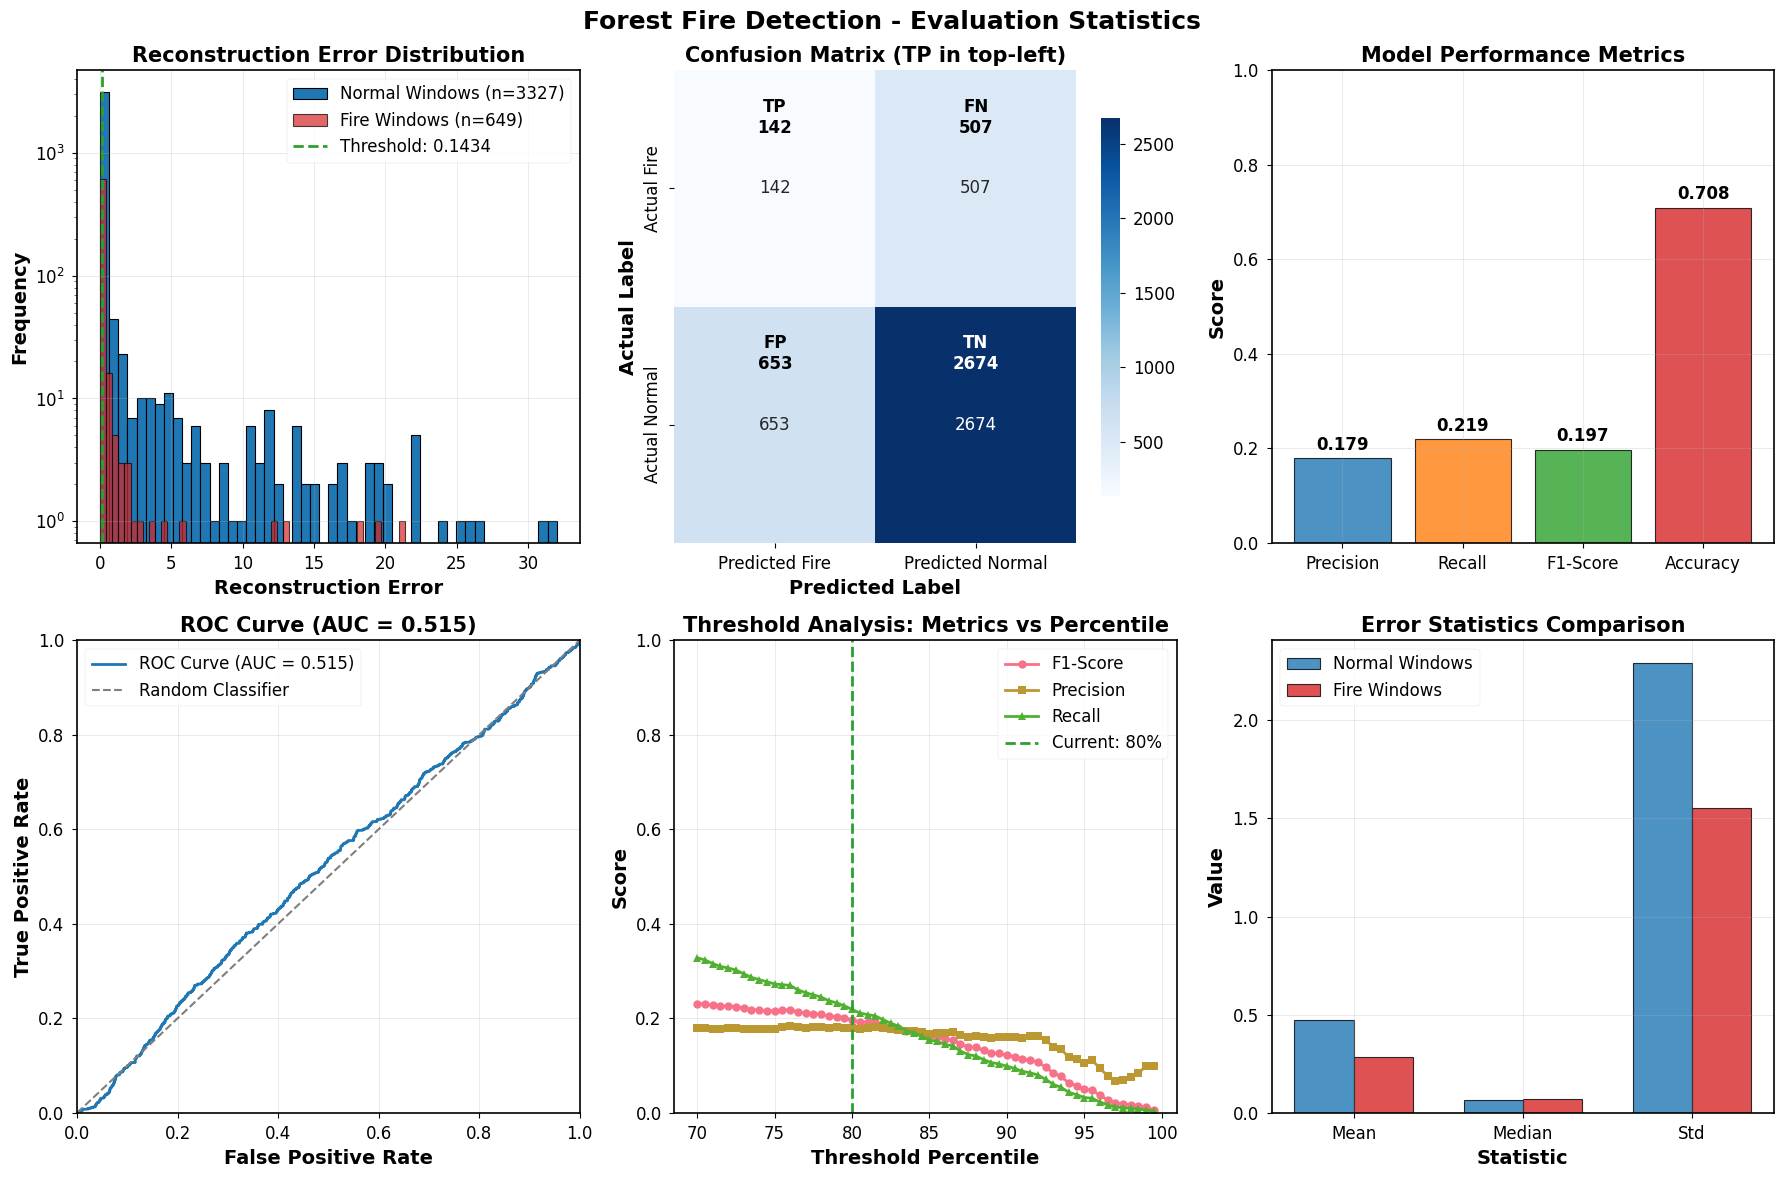

INFO: [Evaluation] Evaluation statistics saved to: output/stats/images/evaluation_statistics.png


2025-08-20 18:22:24,324 - INFO - [Evaluation] Evaluation statistics saved to: output/stats/images/evaluation_statistics.png


INFO: [Evaluation] Evaluation results saved to output/stats/csv/evaluation_results.csv and output/stats/csv/evaluation_summary.json


2025-08-20 18:22:24,331 - INFO - [Evaluation] Evaluation results saved to output/stats/csv/evaluation_results.csv and output/stats/csv/evaluation_summary.json


INFO: Process timeline saved to output/stats/html/evaluation_timeline.html


2025-08-20 18:22:24,359 - INFO - Process timeline saved to output/stats/html/evaluation_timeline.html


INFO: Metrics plot saved to output/stats/html/evaluation_metrics.html


2025-08-20 18:22:24,380 - INFO - Metrics plot saved to output/stats/html/evaluation_metrics.html


In [6]:
# Set to True to skip this step
SKIP_EVALUATE = False

if not SKIP_EVALUATE:
    logging.info("--- Evaluating the model ---")
    reload_all()
    config.ANOMALY_THRESHOLD_PERCENTILE = 80  # Adjusted for better performance
    config.DISTANCE_FILTER_THRESHOLD_M = 5000  # Adjusted for better performance
    model_evaluator.evaluate_model(config)
else:
    logging.info("Skipping Evaluating the model")

2025-08-20 18:22:24,414 - INFO - --- Performing model clustering for the autoencoder model ---


Reloading modules in directory: /home/rmukhia/data/ilab/forestfire
INFO: [DataLoader_Creation] Dataset loaded successfully


2025-08-20 18:22:24,430 - INFO - [DataLoader_Creation] Dataset loaded successfully


INFO: [DataLoader_Creation] Full dataloader created successfully


2025-08-20 18:22:24,431 - INFO - [DataLoader_Creation] Full dataloader created successfully


INFO: [Clustering] Starting embedding analysis


2025-08-20 18:22:24,432 - INFO - [Clustering] Starting embedding analysis


INFO: [Clustering] Extracting embeddings from model


2025-08-20 18:22:24,435 - INFO - [Clustering] Extracting embeddings from model
Extracting embeddings: 100%|██████████| 829/829 [00:00<00:00, 1521.71it/s]

INFO: [Clustering] Embeddings extracted



2025-08-20 18:22:24,998 - INFO - [Clustering] Embeddings extracted


INFO: [Clustering] Reducing dimensionality using TSNE to 2 components


2025-08-20 18:22:24,999 - INFO - [Clustering] Reducing dimensionality using TSNE to 2 components


INFO: [Clustering] Performing K-Means clustering with 50 clusters


2025-08-20 18:23:10,834 - INFO - [Clustering] Performing K-Means clustering with 50 clusters


INFO: [Clustering] K-Means clustering completed


2025-08-20 18:23:18,939 - INFO - [Clustering] K-Means clustering completed


INFO: [Clustering] Performing DBSCAN clustering with eps=0.8, min_samples=5


2025-08-20 18:23:18,940 - INFO - [Clustering] Performing DBSCAN clustering with eps=0.8, min_samples=5


INFO: [Clustering] DBSCAN clustering completed


2025-08-20 18:23:26,132 - INFO - [Clustering] DBSCAN clustering completed


INFO: [Clustering] Generating clustering visualization


2025-08-20 18:23:26,133 - INFO - [Clustering] Generating clustering visualization


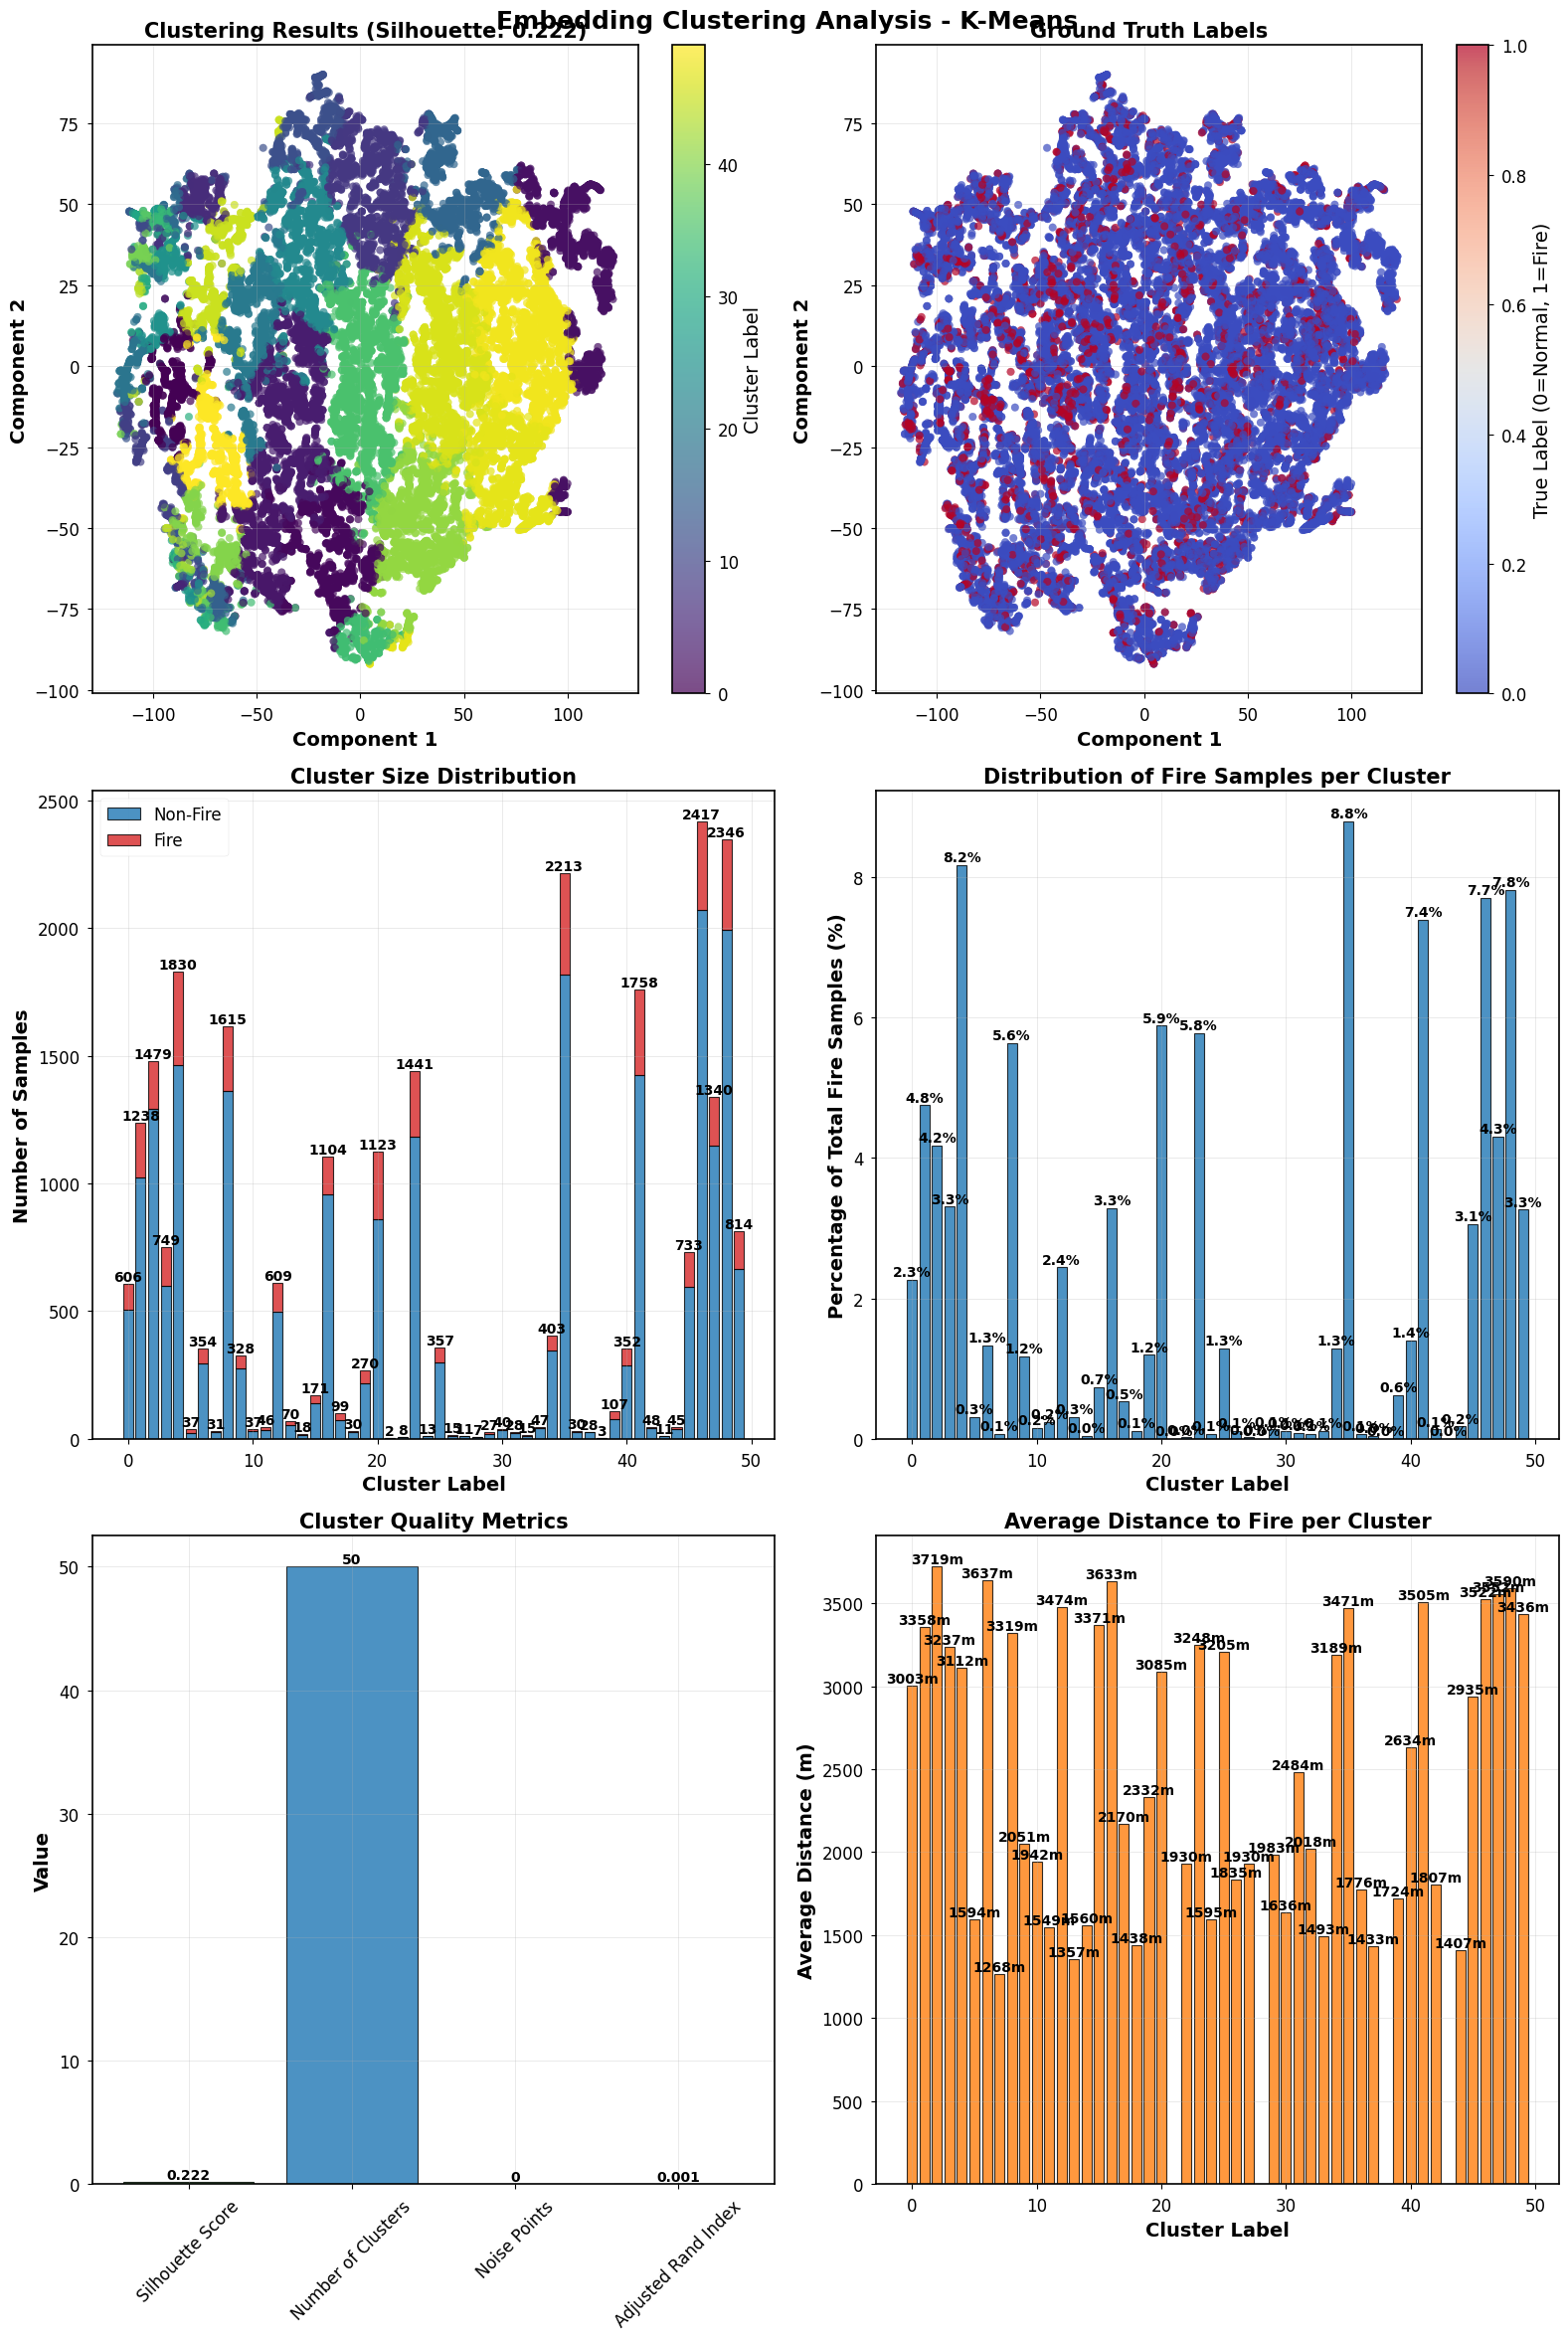

INFO: [Clustering] Clustering visualization saved to: output/stats/images/kmeans_clustering_results.png


2025-08-20 18:23:31,451 - INFO - [Clustering] Clustering visualization saved to: output/stats/images/kmeans_clustering_results.png


INFO: [Clustering] Generating clustering visualization


2025-08-20 18:23:31,452 - INFO - [Clustering] Generating clustering visualization


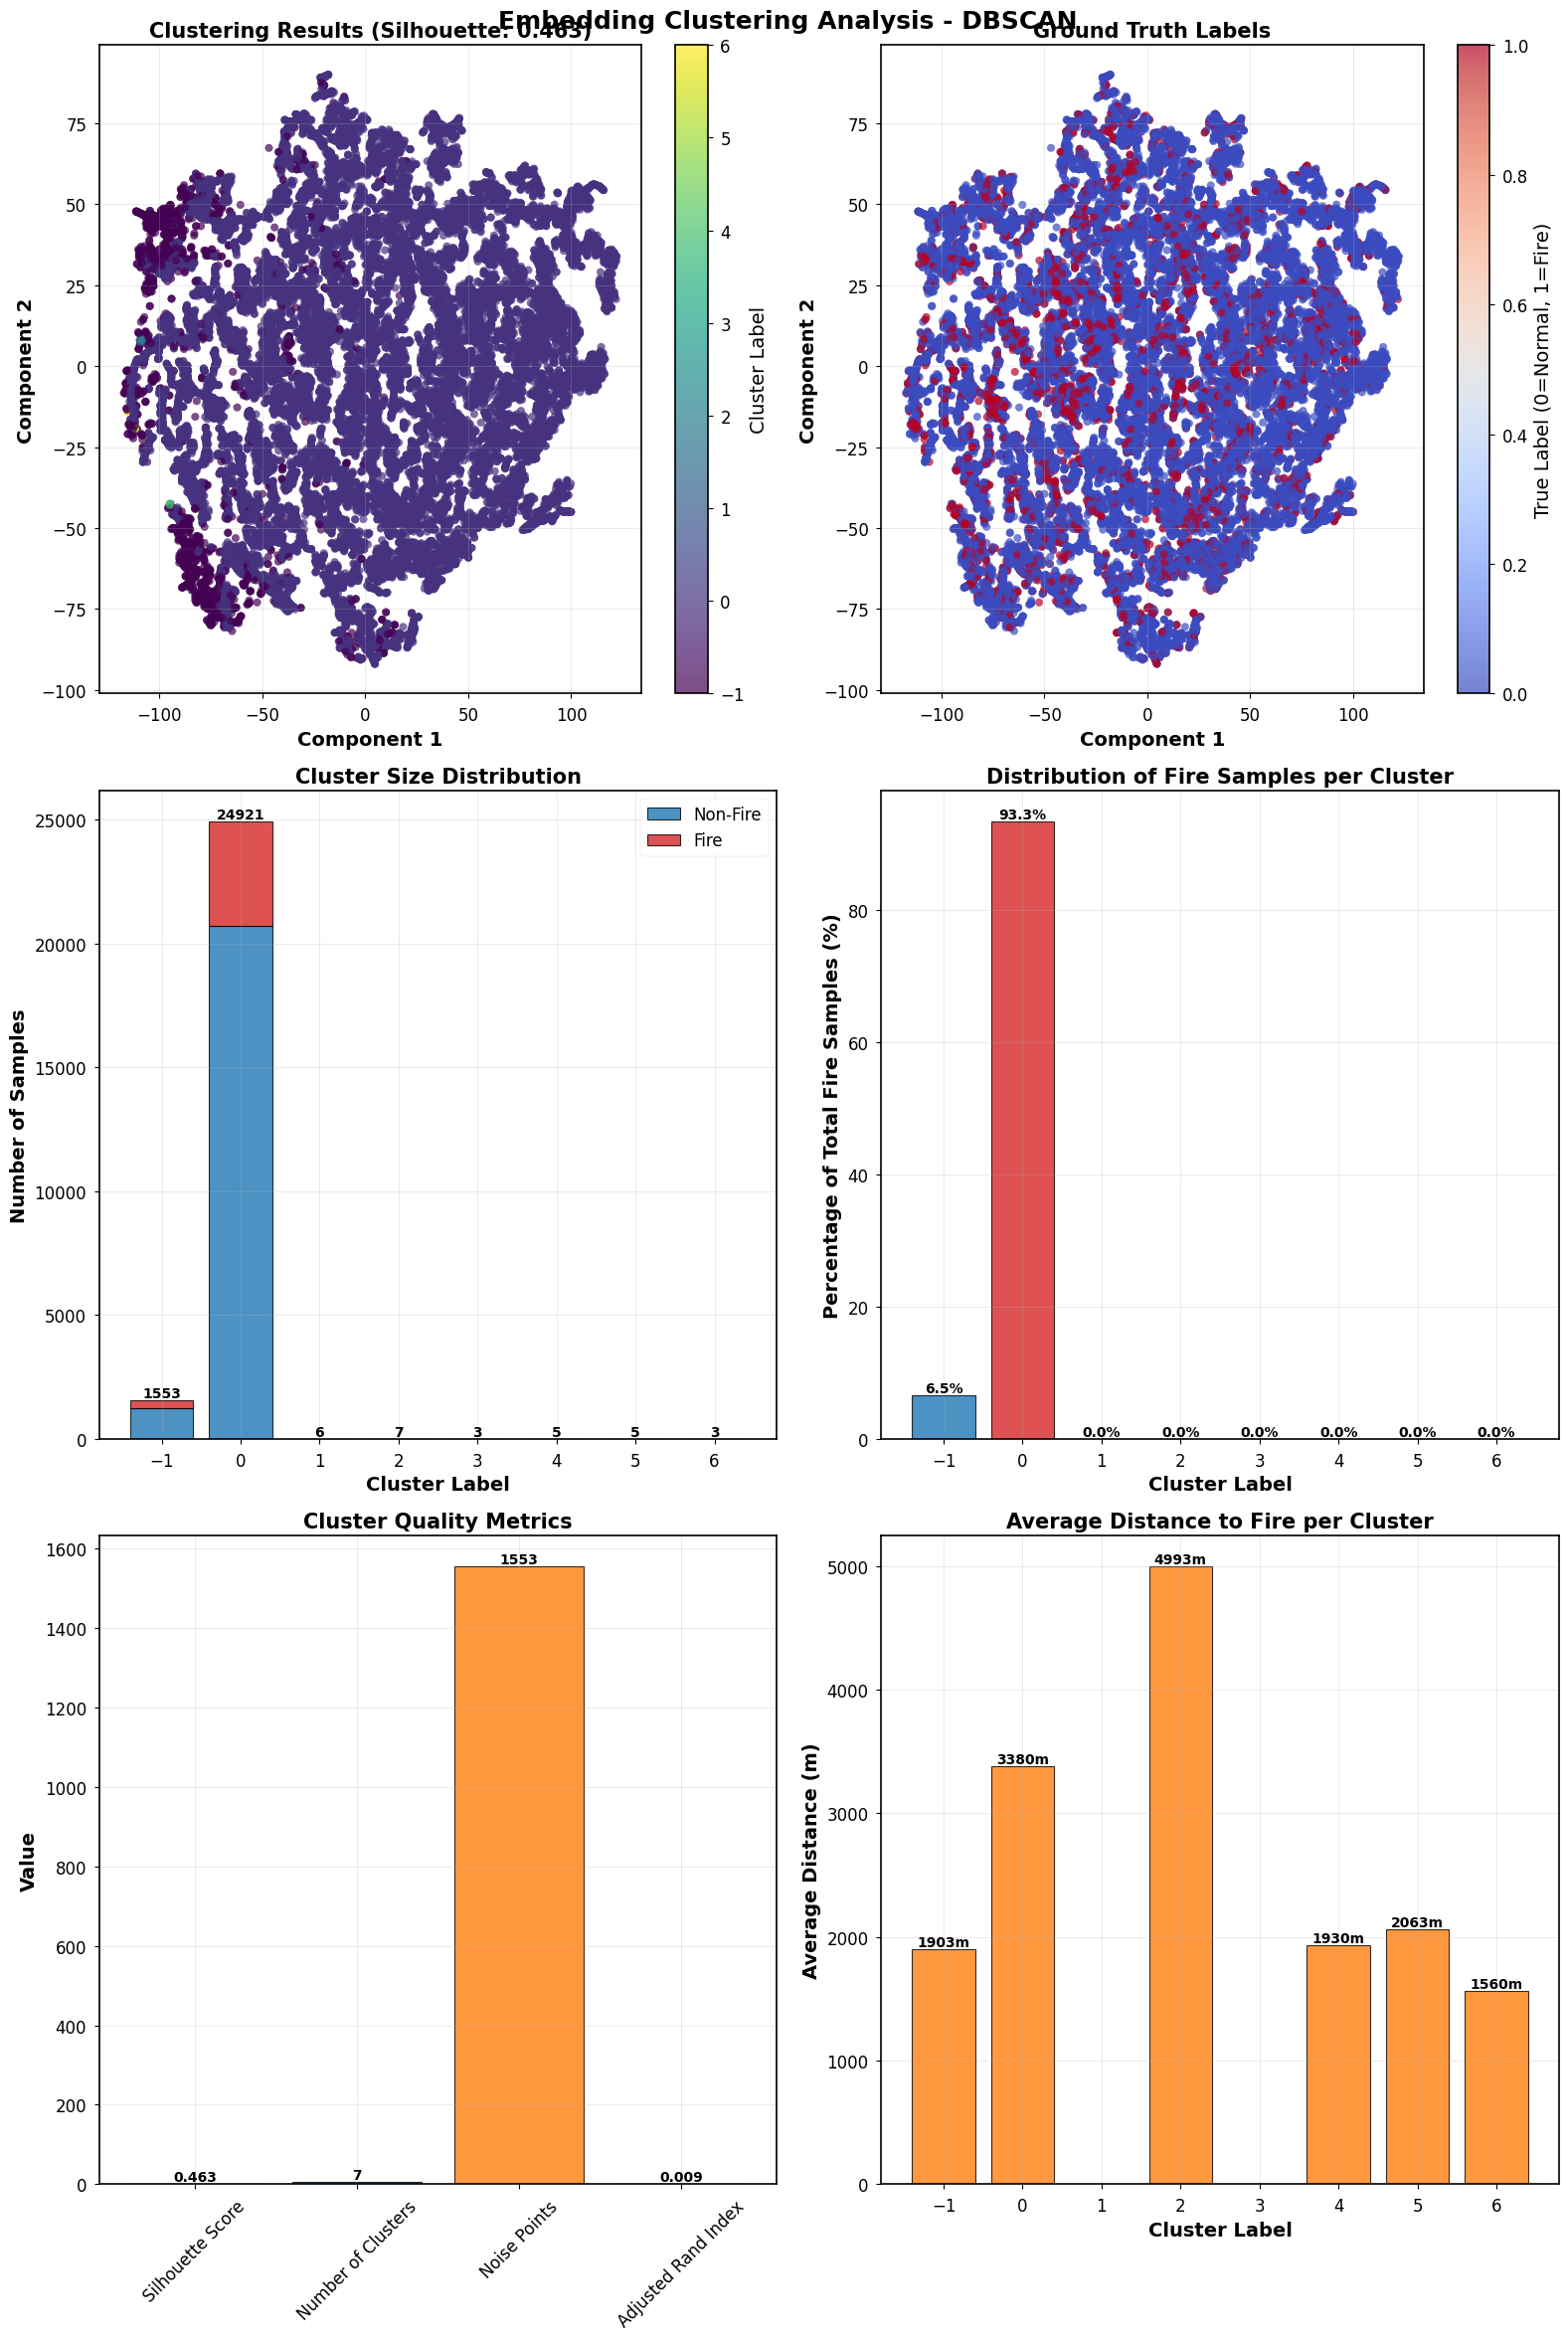

INFO: [Clustering] Clustering visualization saved to: output/stats/images/dbscan_clustering_results.png


2025-08-20 18:23:35,966 - INFO - [Clustering] Clustering visualization saved to: output/stats/images/dbscan_clustering_results.png


INFO: [Clustering] Embedding analysis completed successfully


2025-08-20 18:23:36,009 - INFO - [Clustering] Embedding analysis completed successfully


INFO: Process timeline saved to output/stats/html/clustering_timeline.html


2025-08-20 18:23:36,033 - INFO - Process timeline saved to output/stats/html/clustering_timeline.html


In [ ]:
SKIP_CLUSTERING = False
import model_clustering

if not SKIP_CLUSTERING:
    logging.info("--- Performing model clustering for the autoencoder model ---")
    reload_all()
    dataloader = model_utils.create_full_dataloader(config)
    config.KMEANS_N_CLUSTERS = 50
    config.DBSCAN_EPS = 0.5
    config.DBSCAN_MIN_SAMPLES = 5
    model_clustering.analyze_embeddings(config, dataloader)
else:
    logging.info("Skipping model clustering for the autoencoder model")    

## 6. Hyperparameter Tuning

This optional step performs hyperparameter tuning to optimize the autoencoder's performance. It systematically explores different combinations of latent dimensions, hidden layers, and anomaly thresholds to find the best configuration.

In [8]:
# Set to True to skip this step
SKIP_HYPERPARAMETER_TUNING =True

if not SKIP_HYPERPARAMETER_TUNING:
    logging.info("--- Performing hyperparameter tuning for the autoencoder model ---")
    tune_hyperparameters_advanced(config)
else:
    logging.info("Skipping Performing hyperparameter tuning for the autoencoder model")

2025-08-20 18:23:36,057 - INFO - Skipping Performing hyperparameter tuning for the autoencoder model


## Workflow Completed

The entire forest fire detection workflow has been executed. You can now review the generated outputs in the `output/` directory.

### Key Benefits of the Refactored Structure:

- **Clear Module Organization**: Each import now comes from a logically named module
- **Single Responsibility**: Each module has a focused purpose
- **Easy Maintenance**: Code is organized and easy to find
- **No Circular Dependencies**: Clean import structure

### Updated Module Mapping:

- `data_preprocessing` → Data resampling and windowing
- `data_filtering` → Window and distance filtering  
- `data_annotation` → Fire distance calculations
- `data_sequences` → Dataset creation and sequences
- `model_training` → Autoencoder training workflow
- `eval_metrics` → Model evaluation and metrics
- `eval_tuning` → Hyperparameter optimization